# 02. 통합 중첩 라플라스 근사 (INLA, The Integrated Nested Laplace Approximation)

<br>

## 02.01. 
- 수년 동안 베이지안 추론은 모델 매개변수의 사후 결합분포를 계산하기 위해 Markov Chain Monte Carlo 방법(Gilks et al. 1996; Brooks et al. 2011)에 의존
- 이 방법을 통하여 추론된 사후분포는 고차원 공간에 있기 때문에 일반적으로 계산 비용이 매우 많이 듬
- Havard Rue, Martino 및 Chopin(2009)은 베이지안 추론을 더 빠르게 만드는 새로운 접근 방식을 제안

    우선, 모델 매개변수의 사후 결합분포를 추정하는 것을 목표로 하기보다는, 모델 매개변수의 사후 주변분포(posterior margin)에 초점을 맞출 것을 제안
    
    1. 많은 경우, 주변분포의 추론만으로도 모델 매개변수와 잠재 효과를 추론하기에 충분하며, 구하기 어려운 다변량 사후분포를 다룰 필요가 없음 
    
    2. GMRF(Latent Gaussian Markov Random Field)로 표현될 수 있는 모델에 중점
    
    - 모델 적합의 계산 시간을 줄이는 계산상의 이점을 제공(Rue and Held 2005 참조). 
    - Havard Rue, Martino 및 Chopin(2009)은 Laplace 근사를 기반으로 모델 매개변수의 사후 주변분포에 대한 새로운 근사를 개발(MacKay 2003)

<br>

## 02.02. 통합 중첩 라플라스 근사 (INLA, The Integrated Nested Laplace Approximation)

- $n$개의 관측값 $y=(y_1, \dots, y_n)$이 담긴 벡터에 대하여 (결측값 존재 가능성 가정)
    
    일반적으로 관측값 $y_i$의 평균 $\mu_i$은 회귀식을 통하여 예측변수 $\eta_i$로 표현될 수 있음
    
- 관측값들은 선형 예측변수가 주어졌을 때 서로 독립적이라고 가정 

    <br>

    $$\eta_i = \alpha + \sum_{j=1}^{n_\beta} \beta_j z_{ji} +
    \sum_{k=1}^{n_f} f^{(k)}(u_{ki})+\varepsilon_i;\ i=1,\ldots,n$$

    - $\alpha$ : 절편
    - $\beta_j,\;(j=1, \dots, n_\beta)$ : 공변량 $\{\mathbf{z}_j\}_{j=1}^{n_{\beta}}$의 회귀계수
    - $f^{*(k)}$ : $n_f$개의 공변량 $\{\mathbf{u}_k\}_{k=1}^{n_f}$의 관점에서 정의된 함수
        - $f^{*(k)}$는 공변량의 부드러운 또는 비선형 효과, 시간 추세와 계절적인 효과, 시간적이거나 또는 공간적인 랜덤 효과 뿐만아니라, 랜덤 절편과 기울기 등 다양한 형태들을 가정할 수 있음
    - $\epsilon_i$ : 오차항

<br>

- INLA에서, 관심있는 잠재요소들에 대한 집합 $x$

$$\mathbf{x} = \left(\eta_1, \ldots,\eta_n, \alpha, \beta_1, \ldots \right)$$

<br>

- 초매개변수의 집합 $\theta$

$$\theta = (\theta_1, \dots)$$

<br>

#### 잠재요인 $x$와 초매개변수 $\theta$의 사후 결합분포

$$\pi(\mathbf{x}, \theta \mid \mathbf{y})  = \frac{\pi(\mathbf{y} \mid \mathbf{x},
\theta) \pi(\mathbf{x},\theta)}{\pi(\mathbf{y})}\propto \pi(\mathbf{y} \mid \mathbf{x}, \theta) \pi(\mathbf{x}, \theta)$$

- 베이지안 추론에서 $\pi(y)$는 정규화 상수로서 주변 가능도를 의미하며, 계산의 복잡성으로 인하여 제외되는 경우가 많음
    
    하지만 INLA는 이 $\pi(y)$라는 양적변수에 대해서 정확한 근사치를 제공
    
<br>

- 또한 $\pi(y|x,\theta)$는, **관측값 ($y_1, \dots, y_n$)이 잠재요인 $x$와 $\theta$가 고려되었을 때, 독립이라는 가정(조건부 독립)에 의하여**, 아래와 같이 표현

    ($n$개의 관측값들은, 초매개변수 $\theta$에 의존하는 분포를 가진, 잠재요소 $x$가 주어졌을 때 독립적인 것으로 가정 **(조건부 독립)**
)

    $$\pi(\mathbf{y} \mid \mathbf{x}, \theta) = 
    \prod_{i\in \mathit{I}} \pi(y_i \mid x_i, \theta)$$
    
    - **각 관측값 $y_i$는 $x_i$ 하나의 원소에 연결**
    - **여기서 $I$는 관측값의 모든 인덱스에 해당되는 정수의 집합이며, 만약 관측값에 결측값이 포함되어 있다면, 해당 결측값의 인덱스는 $I$에서 제외됨**
    
    (관측값에 결측값이 있어도 INLA를 통하여 사후 예측분포를 계산할 수 있음)

<br>

- $\theta$에 대하여 평균이 0이고 정도행렬 (precision matrix) $Q(\theta)$인 다변량 정규 사전분포를 가정

    즉, $x \sim N(0, Q^{-1}(\theta))$이고, 밀도함수는 아래와 같음
    
    (정도행렬 : 공분산 행렬의 역행렬)
    
$$\pi(\mathbf{x} \mid \theta) = (2\pi)^{-\frac{n}{2}}|\mathbf{Q}(\theta)|^{1/2}\exp\{-\frac{1}{2}\mathbf{x}^T \mathbf{Q}(\theta)\mathbf{x}\} \\
\propto |\mathbf{Q}(\theta)|^{1/2}\exp\{-\frac{1}{2}\mathbf{x}^T \mathbf{Q}(\theta)\mathbf{x}\}$$

<br>

- 잠재 가우스 필드 (latent Gaussian field) $x$의 성분은 GMRF (Gaussian Markov random field)를 따르며,

    GMRF는 $x$의 성분이 조건부 독립을 가정하기 때문에, $Q(\theta)$가 희박한 정도행렬 (sparse precision matrix)이 됨
    
    $\rightarrow$ 계산 시간이 감소

<br>

- **랜덤 효과에 대한 결합분포와, 초매개변수 $\pi(x, \theta)$는 $\pi(x|\theta)$, $\pi(\theta)$로 치환될 수 있으며**

    **$\pi(\theta)$는 초매개변수 $\theta$의 사전 혼합분포 (prior ensemble distribution)**
    


<br>

#### 따라서, 위의 모든 사항을 고려하였을 때, 잠재요인 초매개변수의 사후 결합분포는 아래와 같음

$$\pi(\mathbf{x}, \theta \mid \mathbf{y}) \propto \pi(\theta) \pi(x|\theta) \pi(y|x, \theta)$$

$$\propto \pi(\theta) \pi(x|\theta)  \prod \pi(y_i | x_i, \theta)$$

$$\propto  \pi(\theta) |\mathbf{Q}(\theta)|^{1/2}\exp\{-\frac{1}{2}\mathbf{x}^T \mathbf{Q}(\theta)\mathbf{x}\}\prod_{i\in \mathit{I}} \pi(y_i \mid x_i, \theta)=$$

$$\pi(\theta) |\mathbf{Q}(\theta)|^{1/2}\exp\{-\frac{1}{2}\mathbf{x}^T \mathbf{Q}(\theta)\mathbf{x} + \sum_{i\in \mathit{I}} \log(\pi(y_i \mid x_i, \theta))\}$$

<br>

#### 다만 INLA는 사후 결합분포의 추정에 목적이 있는것이 아닌, 잠재요인 및 초매개변수별 주변분포를 추정하는 것이 목적
- **잠재요인 $x_l$의 주변분포**

$$\pi(x_l \mid \mathbf{y}) = \int \pi(x_i, \theta | y) d\theta= \int \pi(x_l \mid \theta,  \mathbf{y}) \pi(\theta \mid \mathbf{y}) d\theta$$

<br>

- **초매개변수 $\theta_k$의 사후 주변분포**
    - $\theta_{-k}$ : $\theta_k$가 제외된 $\theta$ 집합 $(\theta_1, \dots \theta_{k-1}, \theta_{k+1}, \dots)$

$$\pi(\theta_k \mid  \mathbf{y}) = \int \pi(\theta \mid \mathbf{y}) d\theta_{-k}$$

<br>

### 근사 베이지안 추론



#### 위 식을 통하여, 아래의 두 가지 식을 구해야, 잠재요인과 초매개변수의 사후 주변분포를 계산할 수 있음

<br>

#### (1) $\pi(\theta|y)$를 계산 $\rightarrow$ 이로부터 모든 주변함수 $\pi(\theta_k |y)$를 계산 가능

1. **가우스 근사를 통하여 $\pi(\theta|y)$를 계산**   
- **$x^*(\theta)$ = 주어진 $\theta$에 대한 최빈값**
- **$\tilde{\pi}(x|\theta, y)$는 $\pi(x|\theta, y)$의 가우스 근사**

$${\pi}(\theta|y) = \frac{\pi(x, \theta, y)}{\pi(x|\theta, y)} = \frac{\pi(y|x,\theta)\pi(x, \theta)}{\pi(y)} \frac{1}{\pi(x|\theta, y)}$$

$$=\frac{\pi(y|x, \theta)\pi(y|\theta) \pi(\theta)}{\pi(y)}\frac{1}{\pi(x|\theta, y)}$$

$$\propto \frac{\pi(y|x, \theta)\pi(y|\theta) \pi(\theta)}{\pi(x|\theta, y)}$$

$$\simeq \frac{\pi(y|x, \theta)\pi(x|\theta) \pi(\theta)}{\tilde{\pi}(x|\theta, y)} |_{x=x^*(\theta)} =: \tilde{\pi}(\theta|y)$$



<br>


2. **가우스 근사 $\tilde{\pi}(\theta|y)$에 각 $\theta_{-k}$들에 대한 적분을 통하여,**

    **초매개변수 $\theta_k$의 사후 주변분포를 계산**
    
$$\tilde{\pi}(\theta_k \mid  \mathbf{y}) = \int \tilde{\pi}(\theta \mid \mathbf{y}) d\theta_{-k}$$

- $\pi(x|\theta, y)$가 GMRF와 같은 사전분포처럼 거의 가우스 분포이므로, 이 가우스 근사는 정확

#### (2) $\pi(x_i | \theta, y)$를 계산 $\rightarrow$ 이로부터 잠재요인의 사후 주변분포 $\pi(x_i|y)$를 계산 가능

<br>



#### $\pi(x_i|\theta, y)$를 근사하는 3가지 방법

<br>

#### A. 가우스 근사
- (1)의 $\pi(\theta|y)$에 대한 근사과정에서 도출되는 $\pi(x|\theta, y)$의 가우스 근사 $\tilde{\pi_G}(x|\theta, y)$를 사용 

<br>

#### B. 라플라스 근사
- $\pi_{GG}(x_{-i}|x_i, \theta, y)$ : $x_{-i}|x_i, \theta, y$에 대한 가우스 근사
- $x^*_{-i}(x_i, \theta)$ : 주어진 $x_i,\;\theta$에 대한 최빈값

$$\pi_{LA}(x_i|\theta, y) \propto \frac{\pi(x, \theta, y)}{\pi_{GG}(x_{-i}|x_i, \theta, y)}|_{x_{-i}=x^*_{-i}(x_i, \theta)}$$

* 모든 $x_i$ 값에 대하여 계산이 필요하므로, 계산 시간이 오래 걸림 

    $\rightarrow$ Havard Rue, Martino, and Chopin (2009)는 다른 형태의 라플라스 근사를 제안
    
    $$\pi_{LA}(x_i \mid \theta, \mathbf{y}) \propto N(x_i \mid \mu_i(\theta), \sigma_i^2(\theta)) \exp(spline(x_i))$$
    
    <br>
    
    $\rightarrow$ **가우스 근사와, $x_i$에 대한 3차 스플라인(cubic spline)의 곱에 의존하는 형태**
    
    (3차 스플라인은 가우스 근사의 값을 보정)

<br>

#### C. 간소화된 라플라스 근사
- $x_i = \mu_i(\theta)$인근의 값에 대해서만 라플라스 근사 계산
- 일부 값에 대해서만 라플라스 근사를 적용함으로서, 계산이 더욱더 간소화

<br>

<hr>

#### 근사된 $\tilde{\pi}(x_i|\theta, y)$와 $\tilde{\pi}(\theta, y)$를 통하여, 잠재요인에 대한 사후 주변분포를 근사

$$\tilde{\pi}({x_i|y}) = \int \tilde{\pi}(x_i|\theta, y) \tilde{\pi}(\theta| y) d\theta$$

- 여기서 적분은 유한개의 가중치 합으로 수치적으로 해결
- 적분점 $\{\theta^{(k)}\}_{k=1}^K$과 가중치 $\Delta_k$는 서로 대응되는 값을 가짐

$$\tilde{\pi}({x_i|y}) \simeq
\sum_{k=1}^K \tilde\pi(x_i \mid \theta^{(k)}, \mathbf{y}) \tilde\pi(\theta^{(k)} \mid \mathbf{y}) \Delta_k$$


<br>

- **수치적 적분의 좋은 적분 점 $\{\theta^{(k)}\}_{k=1}^K$을 찾기 위해, 초매개변수의 사후 결합분포 $\tilde{\theta|y}$를 비모수적 방법(그리드 탐색, 중심 합성 설계 등)으로 탐색**
    
    **비모수적 방법을 적용하기 위하여,최빈값을 중심으로 좋은 적분점을 찾기 위하여, $\theta$-공간의 재매개화(reparameterization)이 필요**

<br>

1. $log(\tilde{\pi}(\theta|y)$를 $\theta$에 따라 최적화시켜 $\tilde{\pi}(\theta|y)$의 최빈값 $\theta^*$를 Newton-Raphson 방법을 이용하여 탐색


2. 최빈값에서 음의 헤시안 (negative Hessian) $H$를 계산 (사후분포가 가우스 분포라면 $H^{-1}$는 분산행렬)

    - 헤시안 행렬 : 함수의 2계 도함수를 이용하여 만든 행렬
    - 함수 $f(x_, \dots x_n)$에 대한 헤시안 행렬 $H =
\begin{bmatrix}
 \frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1\partial x_2} & \cdots & \frac{\partial^2f}{\partial x_1\partial x_n}  \\\\
 \frac{\partial^2f}{\partial x_2\partial x_1} & \frac{\partial^2f}{\partial x_2^2} & \cdots & \vdots  \\\\
 \vdots & \vdots & \ddots & \vdots  \\\\
 \frac{\partial^2f}{\partial x_n\partial x_1} & \cdots & \cdots &  \frac{\partial^2f}{\partial x_n^2}
 \end{bmatrix}$


3. 고윳값 분해를 사용하여 $H^{-1}=V \Lambda V^T$로 분해

4. 초매개변수 $\theta$의 각 값에 대해, 표준화되고 상호 직교하는 성분으로 이루어진 새로운 변수 $z$를 재정의

$$\theta(z)=\theta^* + VA^{1/2}z$$

<br>

#### $\theta$-공간의 재매개화 이후, 두 가지 방법을 적용하여 적분점 $\theta^{(k)}$ 탐색

#### 1. 그리드 탐색
- 최빈값($z=0$)을 중심으로하는 $h$개의 정규 그리드를 사용하며, 그리드의 포인트는 주어진 임곗점 $\delta$에 대해, 아래의 조건을 만족할 때 정의됨

$$|\log(\tilde\pi(\theta(\mathbf{0}) \mid \mathbf{y})) - \log(\tilde\pi(\theta(\mathbf{z}) \mid \mathbf{y})) | < \delta$$

- 그리드에 대한 탐색은 $z$ 매개화에서 축을 따라 수행되며, 조건을 충족하는 모든 중간점이 선택

 이를 통하여 적분에 사용될 수 있는, 사후분포 최빈값에 대한 초매개변수의 구성 (적분점  $\theta^{(k)}$)을 얻음

<br>

#### 2. 중심 합성 설계
- $θ(0)$을 중심으로 한 중심 합성 설계(CCD, Box and Draper 1987)를 사용하여 정규 그리드에서 점을 사용하는 대신 전략적으로 배치된 몇 개의 지점을 탐색
    
    초매개변수의 공간의 차원이 증가할수록 그리드 전략보다 더 효율적
    
    
<br>

#### 탐색 이후, 각 사후 주변분포 $\pi(\theta_k|y)$는 $\pi(\theta |y)$를 적분점 $\theta^{(k)}$에서 계산된 적분 알고리즘을 이용하여 계산


<br>

## 02.03. `INLA` 패키지

<br>

### 다중회귀

In [11]:
library(MASS)
library(tidyverse)
library(tidymodels)
library(INLA)

In [22]:
cement %>% dim
cement %>% head

[1] 13  5

,x1,x2,x3,x4,y
,<int>,<int>,<int>,<int>,<dbl>
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2


<br>

#### 회귀모형
$$y_i = \beta_0 + \sum_{j=1}^4\beta_j x_{j,i}+ \varepsilon_i$$

**사전분포**
- $\varepsilon \sim ~ N(0, \tau)$
- $\tau \sim Gamma(1, 0.00005)$
- $\beta_0 \sim N(0, \sigma(\beta_0)))$
- $\beta_j \sim N(0, 0.001)$



<br>

#### `inla()`
- `control.fixed` : 절편과 회귀계수에 대한 사전분포의 매개변수 설정

    예) `control.fixed = list(prec = 0.01, compute = "mode", name = "f", solve = TRUE)`
    
    - list의 원소의 구성
        - `prec.intercept` : 절편의 가우스 사전분포에 대한 정밀도 설정 (`default : 0`)
        - `mean.intercept` : 절편의 가우스 사전분포에 대한 평균 설정 (`default : 0`)
        - `prec` : 회귀계수의 가우스 사전분포에 대한 정밀도 설정 (`default : 0.001`)
        - `mean` : 회귀계수의 가우스 사전분포에 대한 평균 설정 (`default : 0`)
        - `compute` : 회귀계수의 사후분포에 대해 계산해야할 통계량 입력 (`default : mean`)

In [23]:
m1 <- inla(y ~ x1 + x2 + x3 + x4, data = cement)

In [24]:
summary(m1)


Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

<br>

#### `inla`객체의 요소
- `summary.fitted.values` : 적합값의 요약 통계량
- `summary.fixed` : 회귀계수에 대한 요약 통계량
- `summary.random` : 랜덤효과에 대한 요약 통계량
- `summary.linear.predictor` : 예측값에 대한 요약 통계량
- `marginals.fitted.values` : 적합값에 대한 사후 주변분포
- `marginals.fixed` : 회귀계수에 대한 사후 주변분포
- `marginals.random` :  랜덤효과에 대한 사후 주변분포
- `marginals.linear.predictor` : 예측값에 대한 사후 주변분포
- `milk` : 주변 가능도 추정치

In [30]:
m1$summary.fitted.values

,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fitted.Predictor.01,78.49486,1.7618230,74.97566,78.49473,82.01527,78.49471
fitted.Predictor.02,72.78995,1.3709343,70.05199,72.78971,75.52973,72.78948
fitted.Predictor.03,105.97348,1.8025230,102.37401,105.97307,109.57593,105.97262
fitted.Predictor.04,89.32802,1.2903818,86.75088,89.32781,91.90676,89.32762
fitted.Predictor.05,95.64935,1.4203868,92.81228,95.64921,98.48766,95.64913
fitted.Predictor.06,105.27493,0.8369143,103.60337,105.27481,106.94739,105.27472
fitted.Predictor.07,104.14885,1.4391250,101.27436,104.14870,107.02463,104.14861
fitted.Predictor.08,75.67460,1.5180679,72.64228,75.67450,78.70794,75.67449
fitted.Predictor.09,91.72304,1.2880602,89.15071,91.72278,94.29725,91.72252


<br>

### 일반화 선형회귀

#### `inla.models()` : `INLA`에서 설정 가능한 가능도, 연결함수 등의 목록 확인 가능
- `latent` : 사용가능한 잠재모형 목록
- `group` : 관측값들을 그룹화할 때 사용 가능한 모형 목록
- `link` : 사용가능한 연결함수 목록
- `hazard` : 사용가능한 위험함수 목록
- `likelihood` : 사용가능한 가능도 목록
- `prior` : 사용가능한 사전분포 목록

<br>



In [36]:
names(inla.models()$group)

[1] "exchangeable"    "exchangeablepos" "ar1"             "ar"             
[5] "rw1"             "rw2"             "besag"           "iid"

- `INLA`에서 사용가능한 연결함수 목록

In [35]:
names(inla.models()$link)

[1] "default"     "cloglog"     "ccloglog"    "loglog"      "identity"   
 [6] "inverse"     "log"         "loga"        "neglog"      "logit"      
[11] "probit"      "cauchit"     "tan"         "quantile"    "pquantile"  
[16] "sslogit"     "logoffset"   "logitoffset" "robit"       "sn"         
[21] "powerlogit"  "test1"       "special1"    "special2"

<br>

#### `INLA`를 사용하여 일반화 선형회귀 적합

In [38]:
library(spdep)

In [39]:
data(nc.sids)

In [41]:
nc.sids %>% dim
nc.sids %>% head

[1] 100  15

,CNTY.ID,BIR74,SID74,NWBIR74,BIR79,SID79,NWBIR79,east,north,x,y,lon,lat,L.id,M.id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ashe,1825,1091,1,10,1364,0,19,164,176,-81.67,4052.29,-81.48594,36.43940,1,2
Alleghany,1827,487,0,10,542,3,12,183,182,-50.06,4059.70,-81.14061,36.52443,1,2
Surry,1828,3188,5,208,3616,6,260,204,174,-16.14,4043.76,-80.75312,36.40033,1,2
Currituck,1831,508,1,123,830,2,145,461,182,406.01,4035.10,-76.04892,36.45655,1,4
Northampton,1832,1421,9,1066,1606,3,1197,385,176,281.10,4029.75,-77.44057,36.38799,1,4
Hertford,1833,1452,7,954,1838,5,1237,411,176,323.77,4028.10,-76.96474,36.38189,1,4


<br>

#### 포아송 회귀 분석 예시

$$O_i \sim Po(\mu_i),\ i=1,\ldots, 100$$

$$\log(\mu_i) = \log(E_i) + \beta_0 +\beta_1 nw_i,\ i=1,\ldots, 100$$

<br>

* $P_i$ : $i$ 지역의 출생아 수
- $O_i$ : $i$ 지역에서 발생한 유아 돌연사 발생 수
- $E_i$ : $i$ 지역 유아 돌연사 발생 기댓값

$$E_i = P_i \frac{\sum_{i=1}^{100} O_i}{\sum_{i=1}^{100} P_i}$$


In [43]:
r <- sum(nc.sids$SID74) / sum(nc.sids$BIR74)
nc.sids$EXP74 <- r * nc.sids$BIR74

- $nw_i $ : $i$ 지역의 전체 출생 비율에서의 유색인종 비율

In [45]:
nc.sids$NWPROP74 <- nc.sids$NWBIR74 / nc.sids$BIR74

<br>

- 포아송 회귀 적합
    - 유색인종의 출생 비율이 높은 지역에서, 유아 돌연사 발생이 높음을 확인

In [46]:
m.pois <- inla(SID74 ~ NWPROP74, data = nc.sids, family = "poisson", E = EXP74)
summary(m.pois)


Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

<br>

- **모형 수정 : 각 관측값 (인덱스)에 따른 가우스 랜덤 효과 변수 포함**
    - 모든 관측값이 동일한 랜덤 효과를 공유하는 경우 적용 가능


    
$$\log(\mu_i) = \log(E_i) + \beta_0 +\beta_1 nw_i + u_i,\ i=1,\ldots, 100$$

$$u_i \sim N_{iid}(0, \tau_u)$$

$$\tau_u \sim Gamma(1, 0.0005)$$

In [47]:
m.poisover <- inla(SID74 ~ NWPROP74 + f(CNTY.ID, model = "iid"),
                   data = nc.sids, family = "poisson", E = EXP74)

- **추가된 가우스 랜덤 효과 변수의 정밀도는 큰 사후 평균과 사후 중위수를 가짐 $\rightarrow$ 해당 변수가 데이터의 과분산을 잘 설명함을 의미**

- **수정된 모델의 Marginal likelihood는 이전 모델보다 작음 (-226.13 > -227.87) $\rightarrow$ 수정된 모형이 더 나은 적합도를 가진 모델이 아님**
- **수정된 모델은 구조 측면에서도 더 복잡하며, 따라서 수정된 모델을 채택할 근거가 없다고 할 수 있음**

In [48]:
summary(m.poisover)


Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

<br>

## 02.04. 모델 평가 및 선택
- `INLA`는 모델 평가와 선택을 위한 다양한 베이지안 척도를 사용 가능
- **`INLA`객체를 통하여 모델을 적합할 때 `control.compute` 매개변수에 사용할 척도를 입력**

    예) `control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE)`
    
    <br>
    
    - `milk` : Marginal likelihood (Default)
    - `cpo` : CPO (Conditional Predictive Ordinate)
    - `cpo` : PIT (Predictive integral transform)
    - `dic` : DIC (Deviance information criterion)	
    - `waic` : WAIC (Widely applicable Bayesian information criterion)

<br>

### Marginal likelihood (주변 가능도)
* 주어진 모델에서 관측값의 데이터가 관측될 확률 $\pi(y)$
    - $M$개의 모델 세트 $\{\mathcal{M}_m\}_{m=1}^M$에 대하여, 각각의 주변 가능도는 $\pi(\mathbf{y} \mid \mathcal{M}_m)$이며, 모델마다 주변 가능도 값이 서로 다름
- `INLA`에서의 주변 가능도 근사치는 아래와 같음

$$\tilde{\pi}(\mathbf{y}) = \int \frac{\pi(\theta, \mathbf{x},
    \mathbf{y})}
{\tilde{\pi}_{\mathrm{G}}(\mathbf{x} \mid \theta,\mathbf{y})}
\bigg\lvert_{\mathbf{x}=\mathbf{x}^*(\theta)}d {\theta}.$$

- 주변 가능도는, 적합된 모델의 사후 확률을 계산되는데 사용 될 수  있음
    - ($\pi(\mathcal{M}_m)$ = 각 모델의 사전 확률)

$$\pi(\mathcal{M}_m \mid \mathbf{y})  \propto \pi(\mathbf{y} \mid \mathcal{M}_m) \pi(\mathcal{M}_m)$$

- **주어진 두 모델을 비교하기 위해 주변 가능도를 사용하여 Bayes 요인을 계산**
    - 모델 $\mathcal{M}_1$과 $\mathcal{M}_2$의 베이즈 요인

    $$\frac{\pi(\mathcal{M}_1 \mid \mathbf{y})}{\pi(\mathcal{M}_2 \mid \mathbf{y})} =
    \frac{\pi(\mathbf{y} \mid \mathcal{M}_1) \pi(\mathcal{M}_1)}
    {\pi(\mathbf{y} \mid \mathcal{M}_2) \pi(\mathcal{M}_2)}$$

<br>

### CPO (Conditional predictive ordinates)
- CPO (Pettit 1990)는 각 관측값에 대해 다음과 같이 계산되는 모델 평가에 대한 교차검증 척도

$$CPO_i = \pi(y_i  \mid y_{-i})$$

- **관측값 $y_i$에 대한 CPO는, 모델이 $y_i$를 제외한 모든 데이터를 사용하여 적합할 때, 해당 관측값을 관측할 사후 확률**
- CPO 값이 크면 모델이 데이터에 잘 적함됨을 의미하며, 

    CPO 값이 작으면 해당 관측값에 모델이 잘 적합되지 않거나, $y_i$가 이상치임을 의미

<br>

- **CPO를 활용한 아래의 척도는, 값이 작을수록 더 나은 모델 적합성을 의미**

$$-\sum_{i=1}^n \log(CPO_i)$$

<br>

### PIT (Predictive integral transform)
- **각 관측값에 대하여, 새로운 값이 실제 관측된 값보다 낮을 확률을 측정**

$$PIT_i = \pi(y_i^{new} \leq y_i \mid y_{-i})$$

- **이산형 데이터의 경우 조정된 PIT 값은**

    $$PIT_i^{adjusted} =  PIT_i - 0.5 * CPO_i$$이며, $y_i^{new} = y_i$인 경우, 절반의 값으로 계산
    
<br>

- **모델이 관측값을 잘 나타내는 경우, 다른 값들에 대한 분포는 0과 1 사이의 균일 분포에 가까워야 함**

<br>

### DIC & WAIC ( Information-based criteria)

- 이탈도 정보 기준(DIC)은 AIC와 유사한 모델 선택에 대한 대중적인 기준
- 추정된 유효 매개변수의 수를 통하여, 모델의 복잡성을 기반으로 하는 페널티 항과 적합도를 통하여 계산

<br>

$$DIC = D(\hat{\mathbf{x}}, \hat{\theta}) + 2 p_D$$
- $D(\cdot)$ : 이탈도
- $\hat{x}$,  $\hat{\theta}$ : 잠재효과와 초매개변수의 사후 기댓값)
- $p_d$ : 모델 설명변수의 개수 (유효 매개변수 개수)


$$p_D = E[D(\cdot)] - D(\hat{\mathbf{x}}, \hat{\theta})$$

<br>

- WAIC (Watanabe-Akaike Information-based criterio)는 DIC와 유사하나, 유효 매개변수의 수가 다른 방식으로 계산



<br>

### 모델 비교 예제

- 단순 포아송 모델

In [49]:
m.pois <- inla(SID74 ~ NWPROP74, data = nc.sids, family = "poisson", 
               E = EXP74, control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE))

- 가우스 랜덤 효과항 추가 모델

In [50]:
m.poisover <- inla(SID74 ~ NWPROP74 + f(CNTY.ID, model = "iid"),
                   data = nc.sids, family = "poisson", E = EXP74, 
                   control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE))

- 두 모델의 CPO와 PIT 비교결과, 매우 유사함을 확인
    
    $\rightarrow$ 모델의 성능이 비슷하다면, 더 간단한 모델인 '단순 포아송 모델'을 선택하는 것이 바람직

In [61]:
(d <- data.frame(Model = c("Poisson", "Poisson + r. eff."), 
                DIC = c(m.pois$dic$dic, m.poisover$dic$dic),
                WAIC = c(m.pois$waic$waic, m.poisover$waic$waic),
                CPO = c(-sum(log(m.pois$cpo$cpo)), -sum(log(m.poisover$cpo$cpo))),
                MLIK = c(m.pois$mlik[1, 1], m.poisover$mlik[1, 1])
))

Model,DIC,WAIC,CPO,MLIK
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Poisson,441.6218,442.7613,221.3927,-226.1261
Poisson + r. eff.,430.7559,436.8614,224.0755,-227.2356


In [63]:
library("ggplot2")
library("gridExtra")

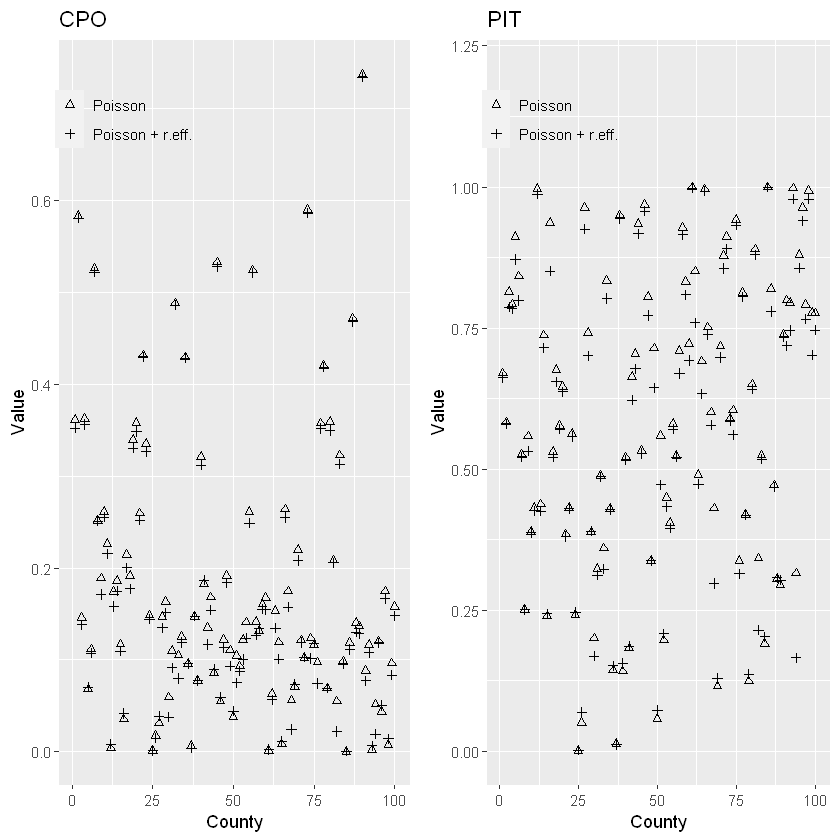

In [64]:
tab <- data.frame(county = rep(1:100, 2), 
  cpo = c(m.pois$cpo$cpo, m.poisover$cpo$cpo),
  pit = c(m.pois$cpo$pit, m.poisover$cpo$pit))
tab$model <- rep(c("Poisson", "Poisson + r.eff."), each = 100)

p1 <- ggplot(tab, aes(x = county, y = cpo, shape = model)) +
  geom_point() +
  scale_shape_manual(values = c(2, 3)) +
  theme(legend.position = c(0.2, 0.9), legend.title = element_blank(),
    legend.background = element_rect(fill = "transparent")) +
  ggtitle("CPO") +
  xlab("County") + ylab("Value")

p2 <- ggplot(tab, aes(x = county, y = pit, shape = model)) +
  geom_point() +
  scale_shape_manual(values = c(2, 3)) +
  theme(legend.position = c(0.2, 0.9), legend.title = element_blank(),
    legend.background = element_rect(fill = "transparent")) +
  ggtitle("PIT") +
  xlab("County") + ylab("Value") +
  ylim(0, 1.2)

grid.arrange(p1, p2, ncol = 2)

<br>

## 02.05. 그 외 옵션
- `INLA`에 추정 프로세스가 수행되고, 결과 출력 방법에 대한 여러 옵션 존재
    - `control.compute` : 모델 적합 중 계산되는 항목들 (CPO, milk 등)에 대한 옵션
    - `control.expert` : 내부 문제에 대한 옵션
    - `control.family` :  모델의 가능도에 대한 옵션
    - `control.fixed` : 모델의 회귀계수에 대한 옵션
    - `control.hazard` : 생존모델에서 위험함수가 어떻게 계산되는지에 대한 옵션
    - `control.inla` : 모델 적합중 어떻게 INLA가 사용되는지에 대한 옵션
    - `control.lincomb` : 선형 조합에 대한 옵션
    - `control.mode` : 모델 적합을 위한 초매개변수의 초기값에 대한 옴션
    - `control.predictor` : 선형 예측이 계산되는 방법에 대한 옵션
    - `control.results` : 주변분포가 계산되는 방법에 대한 옵션
    - `control.update` : 사후분포가 갱신되는 방법에 대한 옵션
    

<br>

### 모델 적합 전략
- `control.inla`를 통하여, 모델 적합 방법에 대한 옵션 설정 가능
    
    예) `control.inla = list(strategy = st, int.strategy = int.st)`
    
    <br>
    
    - `starategy` : 근사 방법 (`'gaussian'`, `'simplified.laplace'` (default), `'laplace'`, `'adaptive'`)
    - `int.strategy` : 적분 방법 (`'auto'` (default), `'ccd'`, `'grid'`, `'eb'` (실증적 베이지안 추론), `'user'`, `'user.std'`)
    - `adaptive.max` : 잠재효과의 최대길이 (default : 10)
        - `strategy`가 `adaptive`일 경우, `adaptive.max` 이하의 길이를 가진 모든 고정 효과 및 잠재 효과에, 선택된 근사 방법이 적용되며, 다른 모든 효과들에 대해서는 `gauissian`이 자동으로 적용    
    - `int.design` : 초매개변수 값 및 관련 가중치의 행렬 (default : `NULL`)

<br>

#### `control.inla` 사용 예시
- 각기 다른 `strategy` 적용

In [73]:
m.strategy <- lapply(c("gaussian", "simplified.laplace", "laplace"), 
    function(st) {
        return(lapply(c("ccd", "grid", "eb"), function(int.st) {
            inla(SID74 ~ NWPROP74 + f(CNTY.ID, model = "iid"),
            data = nc.sids, family = "poisson", E = EXP74,
            control.inla = list(strategy = st, int.strategy = int.st),
            control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE))
    }))
})

- 절편 $\beta_0$에 대한 사후 주변분포 : 근사/적분 방법에 따라 큰 차이가 존재하지 않음

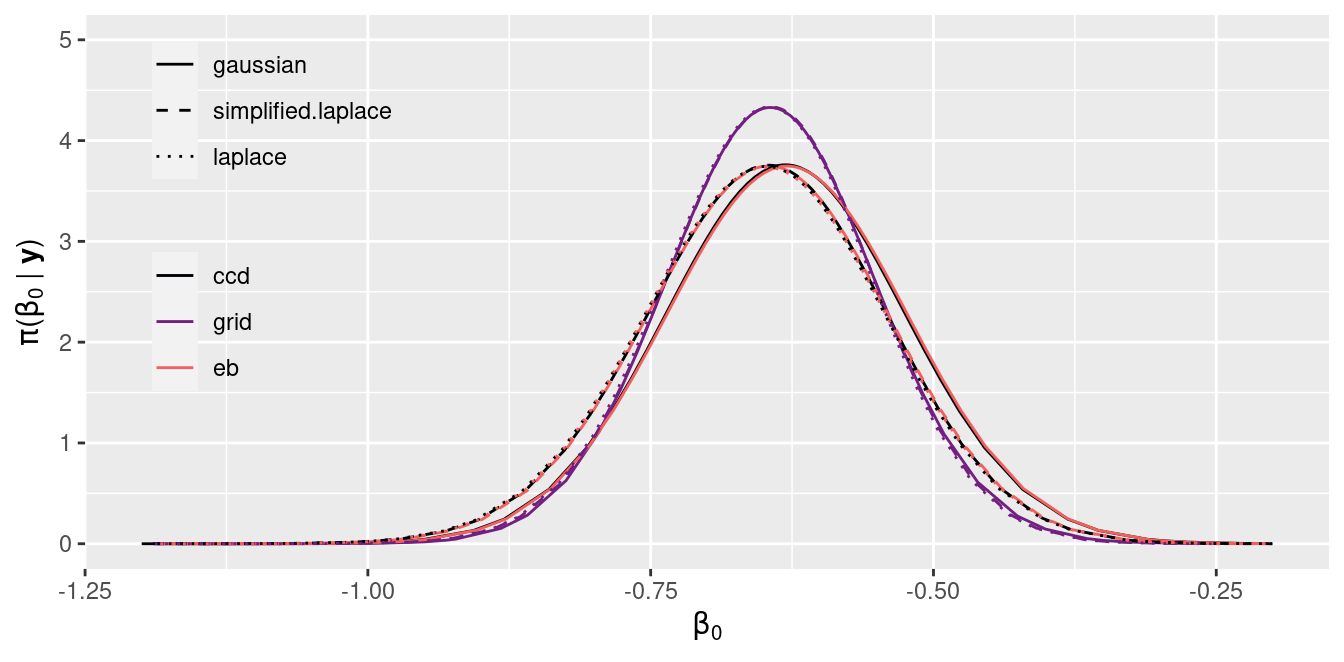

- $\beta_1$에 대한 사후 주변분포 : 근사/적분 방법에 따라 큰 차이가 존재하지 않음

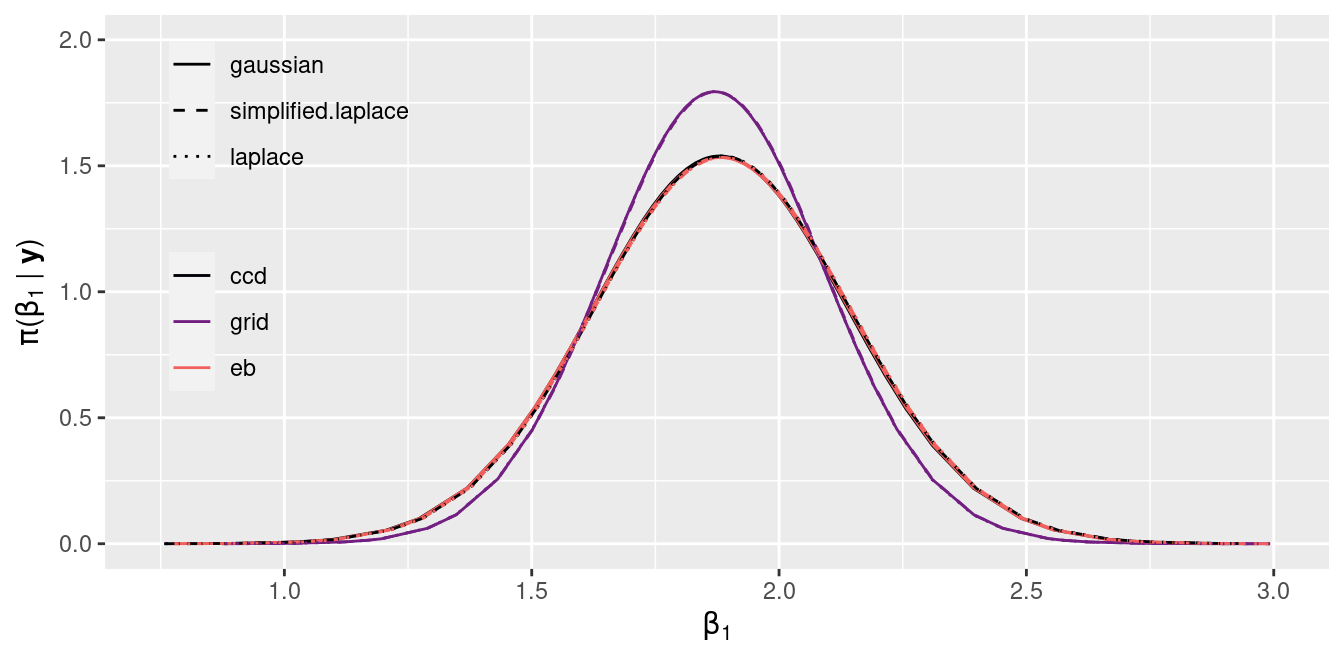

<br>

* 랜덤효과의 정밀도 $\tau_u$의 사후 주변분포 : 근사/적분 방법에 따라 큰 차이가 존재

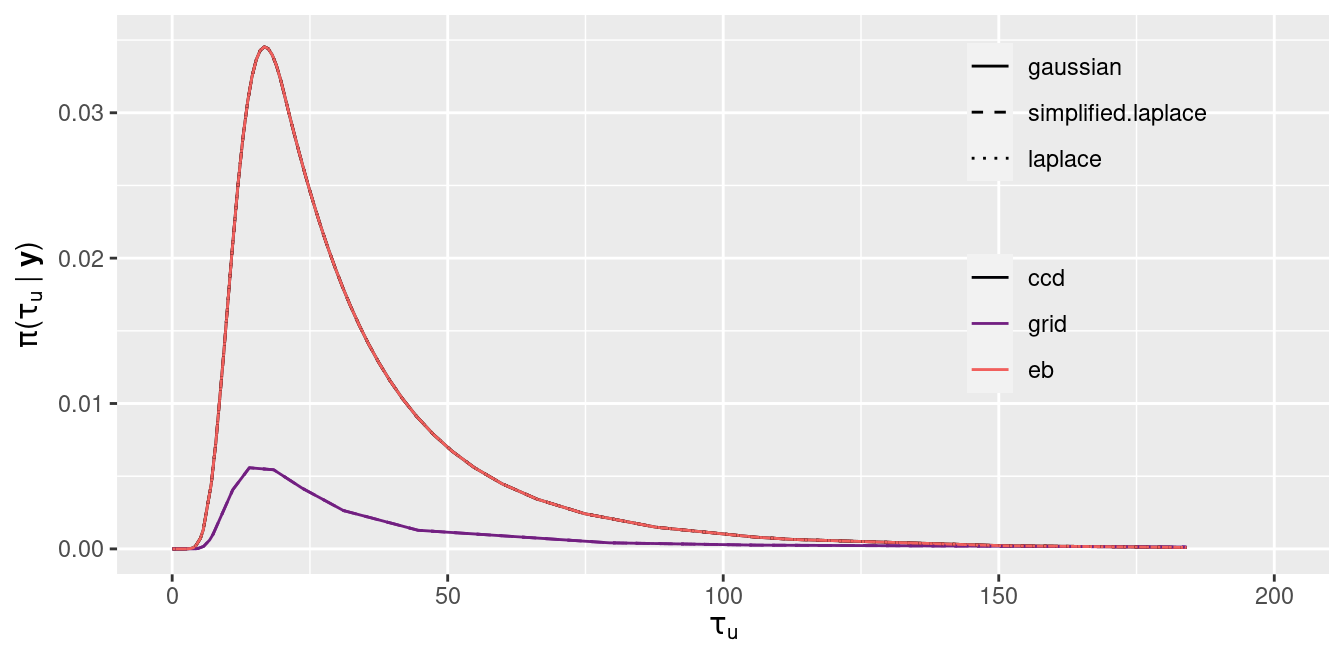

<br>


## 02.06. 사후 주변분포 분석
- **`INLA`는 잠재 효과와 초매개변수의 사후 주변분포에 중점을 두기 때문에, 추론을 위해 이를 활용하는 것이 매우 중요**
- `INLA`는 사후 주변분포에 대한 계산을 수행하는 다양한 기능을 제공
    - `inla.dmarginal` : 사후 주변분포의 확률밀도함수
    - `inla.pmarginal` : 사후 주변분포의 누적분포함수
    - `inla.qmarginal` : 사후 주변분포의 분위수
    - `inla.rmarginal` : 사후 주변분포에서의 랜덤 샘플링
    - `inla.hpdmarginal` : 사후 주변분포에서의 신용구간
    - `inla.smarginal` : 사후 주변분포에 대한 스플라인 평활
    - `inla.emarginal` : 사후 주변분포의 기댓값
    - `inla.mmarginal` : 사후 주변분포의 최빈값
    - `inla.tmarginal` : 사후 주변분포의 매개변수에 대한 주변분포 생성
    - `inla.zmarginal` : 사후 주변분포의 요약통계량

<br>

#### 설명변수 `x1`의 회귀계수와, 가우시안 가능도의 정밀도 $\tau$에 대한 사후 주변분포 분석

In [83]:
plot1 <- ggplot(as.data.frame(m1$marginals.fixed$x1)) + 
  geom_line(aes(x = x, y = y)) +
  ylab (expression(paste(pi, "(", "x", " | ", bold(y), ")")))

In [84]:
plot2 <- ggplot(as.data.frame(m1$marginals.hyperpar[[1]])) + 
  geom_line(aes(x = x, y = y)) +
  ylab (expression(paste(pi, "(", tau, " | ", bold(y), ")")))

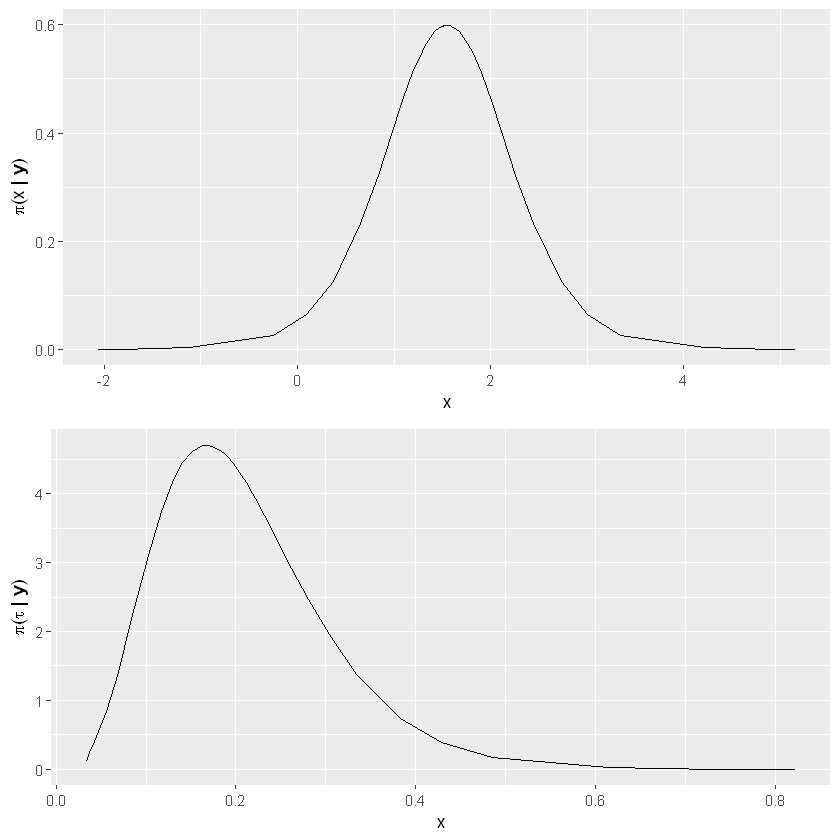

In [85]:
grid.arrange(plot1, plot2, nrow = 2)

<br>

- `x1`의 회귀계수가 1보다 높을 확률

In [91]:
1 - inla.pmarginal(q = 0, m1$marginals.fixed$x1)

[1] 0.9806952

- $\tau$의 95% 신용구간

In [92]:
inla.hpdmarginal(0.95, m1$marginals.hyperpar[[1]])

,low,high
level:0.95,0.05051549,0.3918717


- 가우시안 가능도 표준편차의 사후 주변분포 $\sigma_u = \tau^{-1/2}_u$

In [95]:
marg.stdev <- inla.tmarginal(function(tau) tau^(-1/2),
  m1$marginals.hyperpar[[1]])

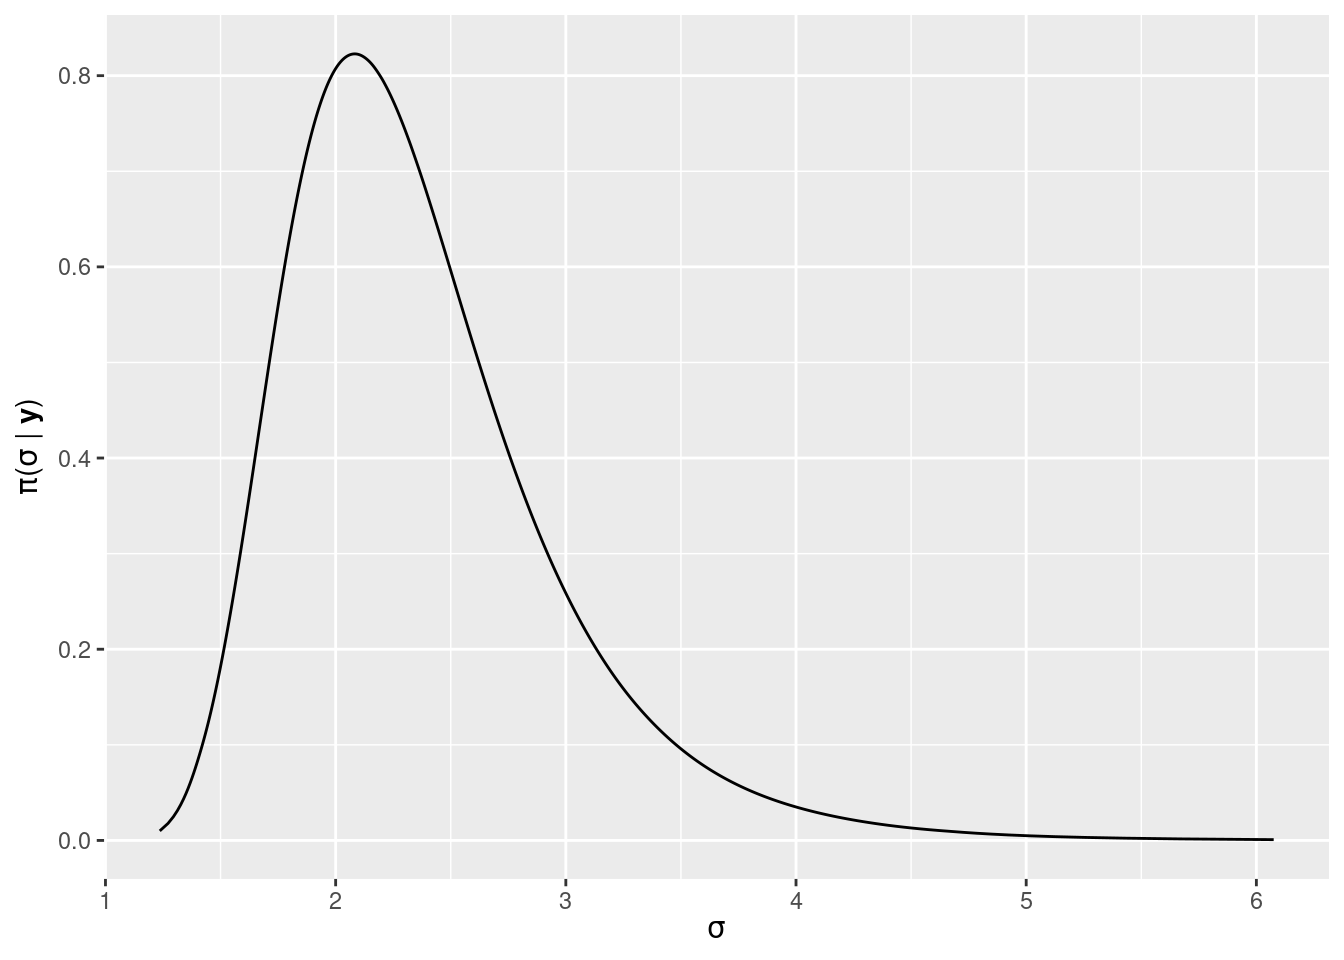

<br>

- 가우스 가능도 표준편차의 사후 주변분포의 요약통계량

In [96]:
inla.zmarginal(marg.stdev)

Mean            2.36443 
Stdev           0.579045 
Quantile  0.025 1.52929 
Quantile  0.25  1.95203 
Quantile  0.5   2.26191 
Quantile  0.75  2.661 
Quantile  0.975 3.80385 


- 가우스 가능도 표준편차의 평균 = $\int \sigma \pi(\sigma \mid \mathbf{y}) d\sigma$

In [97]:
inla.emarginal(function(sigma) sigma, marg.stdev)

[1] 2.364428

- 가우스 가능도 표준편차의 최빈값

In [98]:
inla.mmarginal(marg.stdev)

[1] 2.092144

<br>

## 02.07. 사후 주변분포 샘플링

####  `inla.posterior.sample()` : 잠재 효과와 초매개변수의 결합 사후분포에서 샘플 추출
- `INLA`가 적합될 때, `control.coumpute` 매개변수의 `config`가 `TRUE`로 설정되어있어야 함

    예) `control.compute = list(config = TRUE)`
    
    $\rightarrow$ `inla()`에 의해 반환된 개체에 잠재 GMRF의 내부 표현을 유지
    
    $\rightarrow$ `inla.posterior.sample.eval()` 함수를 사용하여 추출된 샘플에 대한 함수를 평가할 수 있음
    
<br>

- `n` : 샘플링 크기 (default = `"1L"`)
- `result` : `inla`객체
- `selection` : 반환할 모델의 구성 요소가 포함된 리스트
- `intern` : 샘플이 초매개변수의 내부 범위에 포함되어있는지 여부 (default : `FALSE`)
- `use.improved.mean	` : 사후 주변분포의 평균을 사용할지의 여부 (default : `TRUE`)

<br>

- **INLA가 처리할 수 없는 잠재 효과 및 초매개변수에 대한 함수를 추론해야 할 때, 이러한 사후 주변분포 샘플링이 유용** 
    
    예) 여러 매개변수에 대한 다변량 추론이 필요한, 여러 초매개변수에 의존하는 비선형 함수 등
  

<br>

#### `x1`과 `x2`의 회귀계수 곱에 대한 사후분포 샘플링 예시

- 모델 적합

In [135]:
m1 <- inla(y ~ x1 + x2 + x3 + x4, data = cement, control.compute = list(config = TRUE))

- 사후분포 샘플링

In [136]:
m1.samp <- inla.posterior.sample(100, m1, selection = list(x1 = 1, x2 = 1))

In [137]:
m1.samp %>% length

[1] 100

In [138]:
names(m1.samp[[1]])

[1] "hyperpar" "latent"   "logdens"

In [139]:
m1.samp[[1]]

x1:1,2.978077
x2:1,2.564763


- 두 계수의 샘플값에 대한 곱의 분포

In [162]:
x1_ = c(); x2_ = c()

for (i in c(1:100)) {
    x1_ = x1_ %>% append((m1.samp[[i]]$latent)[1])
    x2_ = x2_ %>% append((m1.samp[[i]]$latent)[2])
}

x1x2.samp <- c(x1_ * x2_)

# x1x2.samp <- inla.posterior.sample.eval(function(...) {x1 * x2}, m1.samp)

In [163]:
x1x2.samp %>% summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.40828  0.08689  0.73781  1.14598  1.49404  7.75347 

<br>

#### `inla.hyperpar.sample()`  : 초매개변수의의 사후 결합분포 근사 로부터 샘플을 추출
- `n` : 샘플링 크기
- `result` : `inla` 객체
- `intern	` : 샘플이 초매개변수의 내부 범위에 포함되어있는지 여부 (default : `FALSE`)
- `improve.marginals	` : 더 나은 주변분포의 추정치를 사용하여 샘플을 개선할지의 여부 (default : `FALSE`)

<br>

- 모델에는 하나의 초매개변수(즉, 가우시안 가능도의 정밀도)만 있으므로 추론에 사후 주변분포가 사용 

- 이를 사용하여 랜덤 샘플을 얻고, 값의 분포를 사후 주변분포와 비교

In [164]:
set.seed(123)
prec.samp <- inla.hyperpar.sample(1000, m1)

- 초매개변수 $\tau$의 사후분포 샘플과, 사후 분포와의 비교

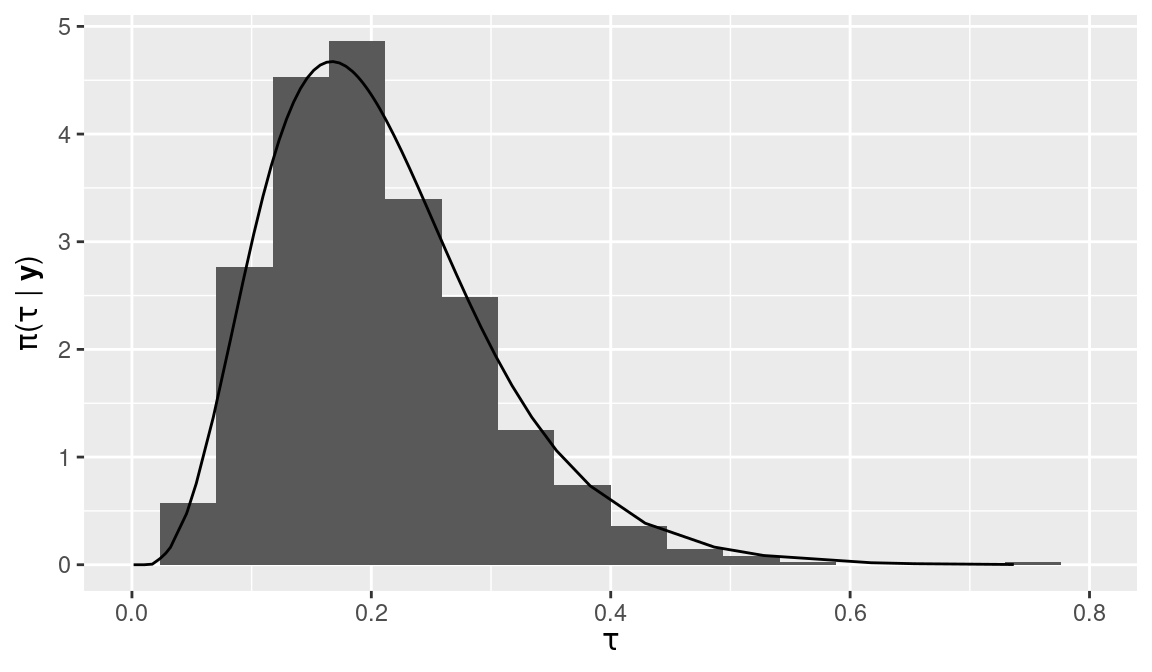